# Crohn Report

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
from sklearn_utils.utils import SkUtilsIO, filter_by_label

X, y = SkUtilsIO('../datasets/crohn_analysis_with_std.json', gz=True).from_json()

In [3]:
from metabolitics.preprocessing import MetaboliticsPipeline

pre = MetaboliticsPipeline(['reaction-diff', 'pathway-transformer'])
X_pathways = pre.fit_transform(X, y)

pre = MetaboliticsPipeline(['reaction-diff', 'feature-selection', 'pathway-transformer'])
X_fs_pathways = pre.fit_transform(X, y)

In [4]:
from sklearn_utils.utils import feature_importance_report

df_pathways = feature_importance_report(X_pathways, y)
df_pathways

labels,Crohn disease,Ulcerative Colitis,healthy,F,pval
Phenylalanine metabolism,5.2e+02,-64,2.1e-14,19,3.5e-05
Tetrahydrobiopterin metabolism,-1.1e+02,-1.2e+02,-3.1e-14,7.8,0.042
CoA catabolism,2.4e+02,1.9e+02,-2.7e-14,7.1,0.049
Histidine metabolism,-2.4e+02,51,-2.1e-14,5.8,0.071
"Transport, lysosomal",45,28,2e-15,6,0.071
"Transport, endoplasmic reticular",28,0.94,4e-15,6.1,0.071
Butanoate metabolism,3.4e+02,1.3e+02,-2.8e-15,5,0.13
,1.1e+02,44,-1.4e-15,1.9,0.42
Heme synthesis,20,9,-4e-15,1.6,0.42
Hyaluronan metabolism,2e+02,61,-9.2e-15,2.4,0.42


In [5]:
df_selected_pathways = feature_importance_report(X_fs_pathways, y)
df_selected_pathways

labels,Crohn disease,Ulcerative Colitis,healthy,F,pval
Phenylalanine metabolism,8.7e+02,-1.1e+02,1.2e-14,19,1.2e-05
"Transport, endoplasmic reticular",6.2e+02,1.4e+02,-2.6e-14,16,6e-05
"Transport, mitochondrial",-5.5e+02,-9.6e+02,4.5e-14,11,0.00077
Folate metabolism,-1.1e+03,-1e+02,-1.1e-14,9.9,0.0012
Histidine metabolism,-1.1e+03,-1e+02,-6.3e-14,9.9,0.0012
Tetrahydrobiopterin metabolism,-7.5e+02,-7.5e+02,-9.7e-14,9.6,0.0012
CoA catabolism,2.6e+02,1.7e+02,-2.8e-14,9.4,0.0012
Biotin metabolism,-9.8e+02,-8e+02,2.3e-14,8.5,0.0021
"Transport, lysosomal",7.9e+02,5.9e+02,-2.3e-14,8.4,0.0021
Tyrosine metabolism,-1.5e+03,-1.2e+03,4.3e-14,8.2,0.0022


## Heatmaps

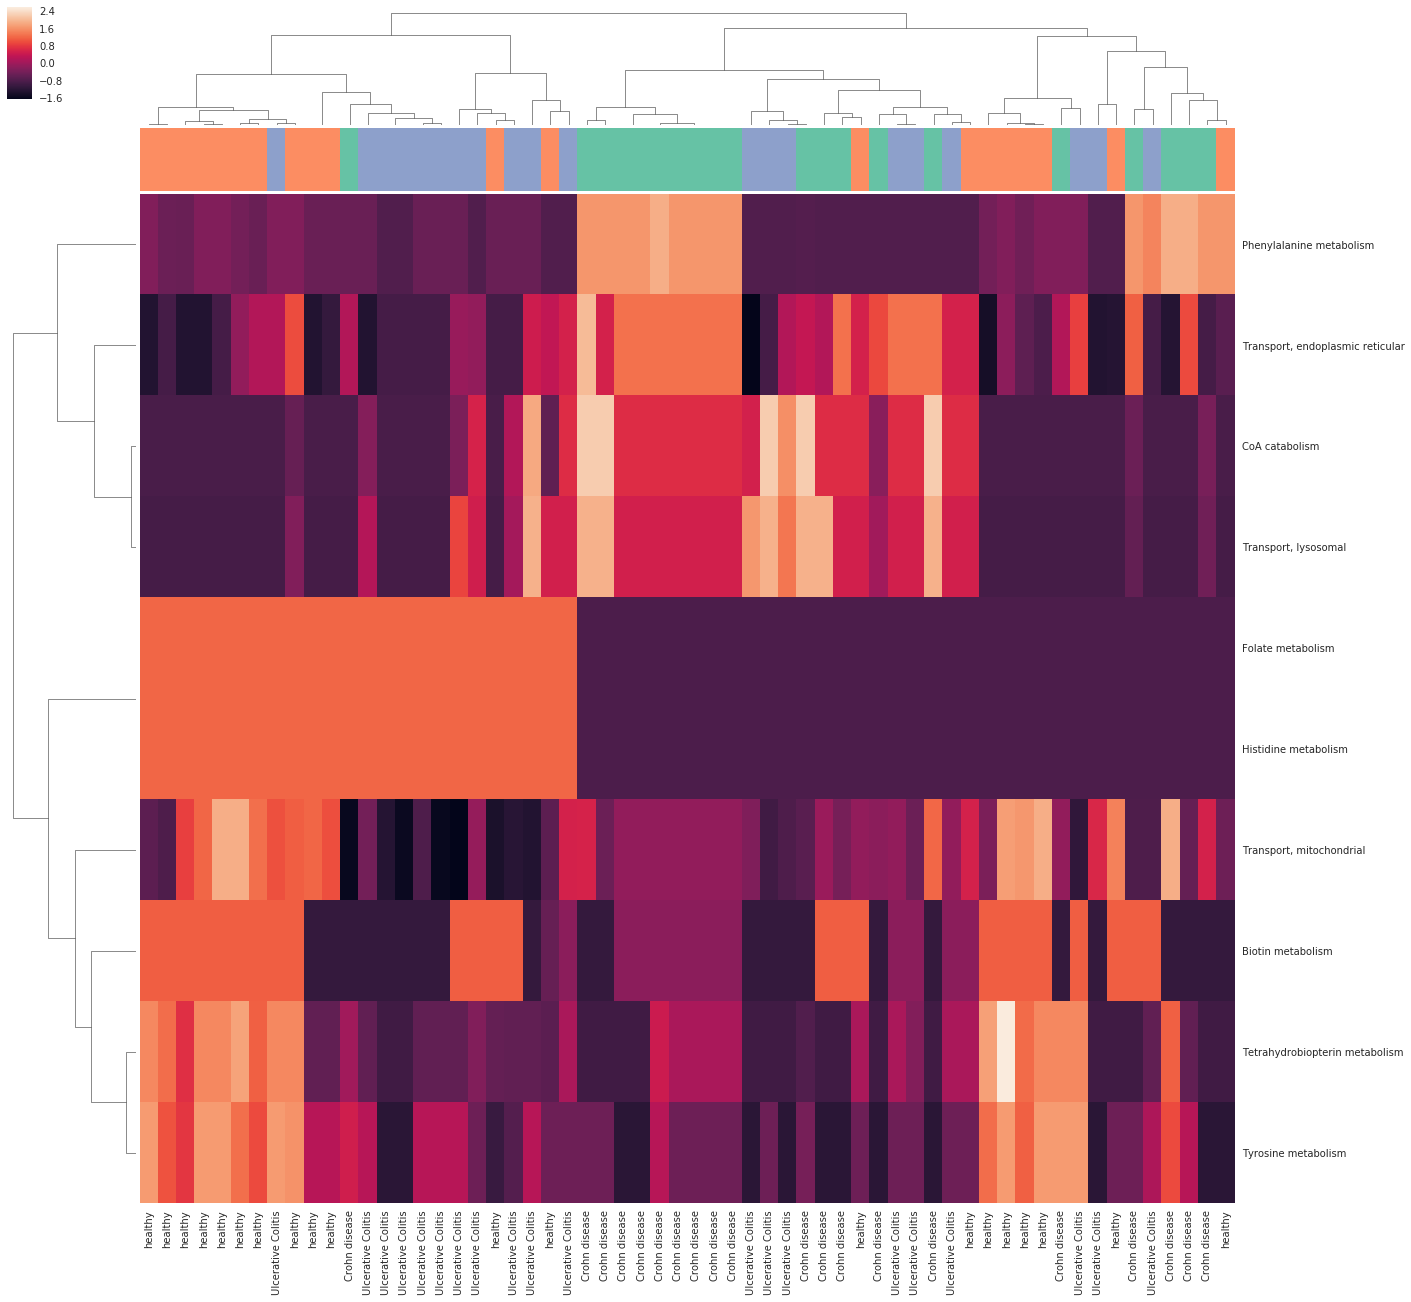

In [27]:
%matplotlib inline

from sklearn_utils.visualization import plot_heatmap

plot_heatmap(X_fs_pathways, y)

## Crohn

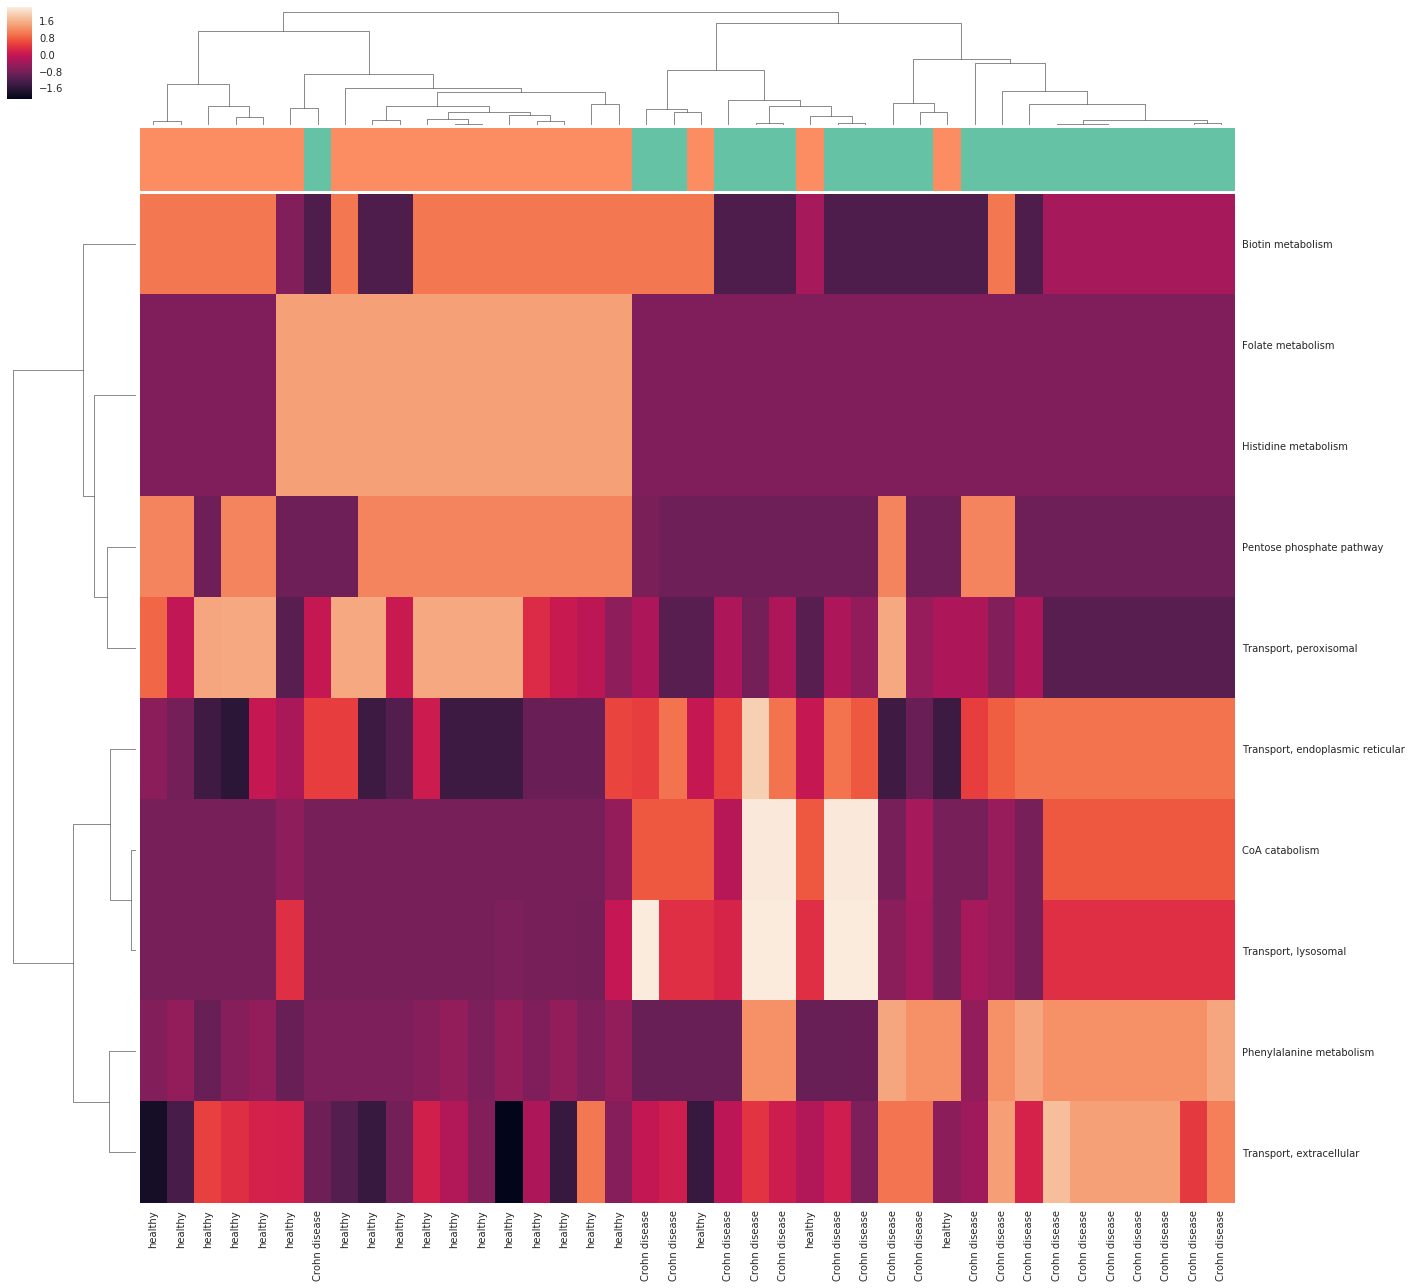

In [11]:
X_crohn, y_crohn = filter_by_label(X, y, 'Ulcerative Colitis', reverse=True)

X_crohn_pathways = MetaboliticsPipeline(['reaction-diff', 'feature-selection', 'pathway-transformer']) \
    .fit_transform(X_crohn, y_crohn)

plot_heatmap(X_crohn_pathways, y_crohn)

In [29]:
feature_importance_report(X_crohn_pathways, y_crohn)

labels,Crohn disease,healthy,F,pval
"Transport, endoplasmic reticular",7.4e+02,-5.7e-14,40,5.6e-06
Folate metabolism,-1.1e+03,-1.1e-14,20,0.00037
Phenylalanine metabolism,8.7e+02,1.2e-14,20,0.00037
CoA catabolism,2.6e+02,-2.8e-14,21,0.00037
Histidine metabolism,-1.1e+03,-6.3e-14,20,0.00037
"Transport, extracellular",2.8e+02,7.1e-15,19,0.00037
"Transport, lysosomal",7.4e+02,-5.7e-15,19,0.00042
Biotin metabolism,-9.8e+02,2.3e-14,17,0.00062
Pentose phosphate pathway,-1.1e+03,1.4e-13,17,0.00062
"Transport, peroxisomal",-6.2e+02,5.7e-14,16,0.00064


## Ulcerative Colitis

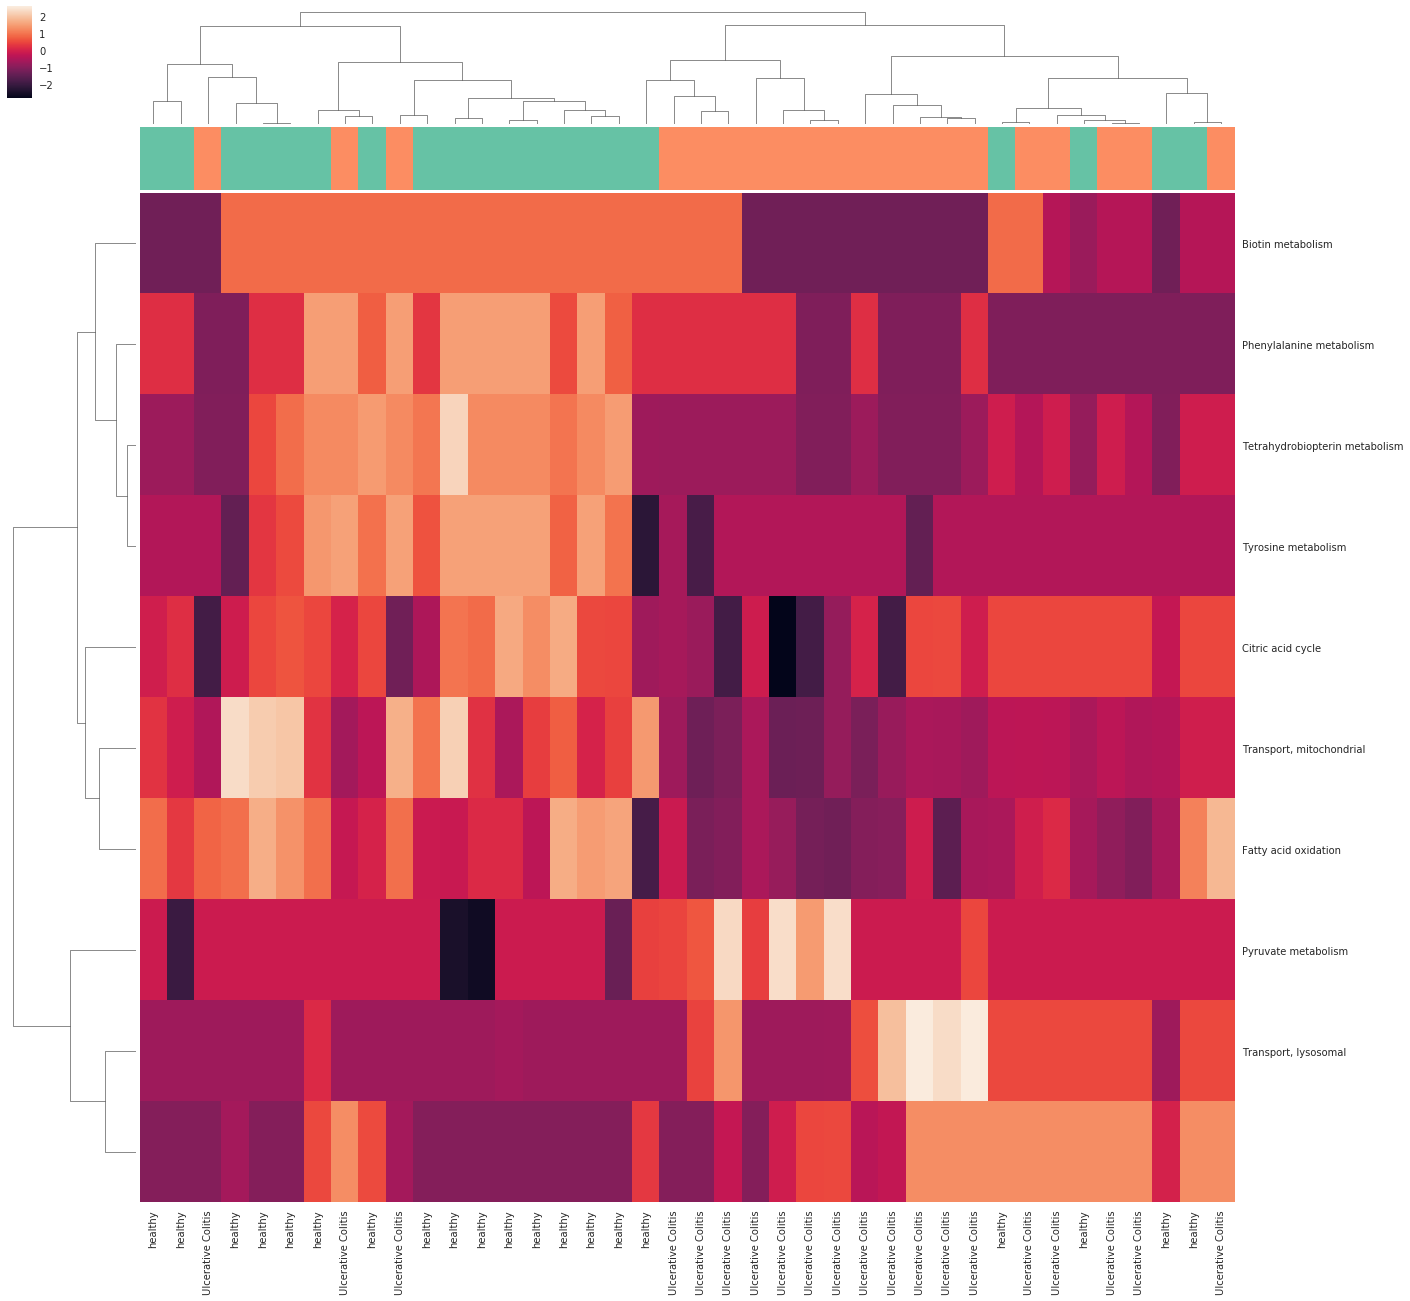

In [15]:
X_ulcerative, y_ulcerative = filter_by_label(X, y, 'Crohn disease', reverse=True)

X_ulcerative_pathways = MetaboliticsPipeline(['reaction-diff', 'feature-selection', 'pathway-transformer']) \
    .fit_transform(X_ulcerative, y_ulcerative)

plot_heatmap(X_ulcerative_pathways, y_ulcerative)

In [31]:
feature_importance_report(X_ulcerative_pathways, y_ulcerative)

labels,Ulcerative Colitis,healthy,F,pval
"Transport, mitochondrial",-4.8e+02,-1.7e-14,19,0.0023
Tetrahydrobiopterin metabolism,-7.5e+02,-9.7e-14,13,0.0084
Citric acid cycle,-3.4e+02,-1.2e-14,13,0.0084
Pyruvate metabolism,3.8e+02,-1.5e-13,11,0.011
"Transport, lysosomal",5.6e+02,-5.7e-15,10,0.013
Biotin metabolism,-8e+02,2.3e-14,9.1,0.019
Fatty acid oxidation,-2.5e+02,-1.1e-14,8.8,0.019
Phenylalanine metabolism,-5.6e+02,-7.7e-14,5.9,0.045
Tyrosine metabolism,-3.6e+02,7.1e-14,5.9,0.045
,1.6e+02,-5.7e-15,6,0.045
